In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [14]:
x_train = pd.read_csv('./data/track1/features/x_train.csv')
x_valid = pd.read_csv('./data/track1/features/x_valid.csv')
x_test = pd.read_csv('./data/track1/features/x_test.csv')
y_train = pd.read_csv('./data/track1/features/y_train.csv')
y_valid = pd.read_csv('./data/track1/features/y_valid.csv')
y_test = pd.read_csv('./data/track1/features/y_test.csv')

### 1. Cluster by Financial indicators

In [15]:
x_train.columns

Index(['BPS', 'PER', 'PBR', 'EPS', 'DIV', 'DPS', '날짜', '거래량', '시가총액', '금리',
       'CODE', '유동자산', '비유동자산', '자산총계', '유동부채', '비유동부채', '부채총계', '이익잉여금',
       '자본총계', '매출액', '영업이익', '법인세차감전 순이익', '당기순이익', '자본금'],
      dtype='object')

<AxesSubplot:>

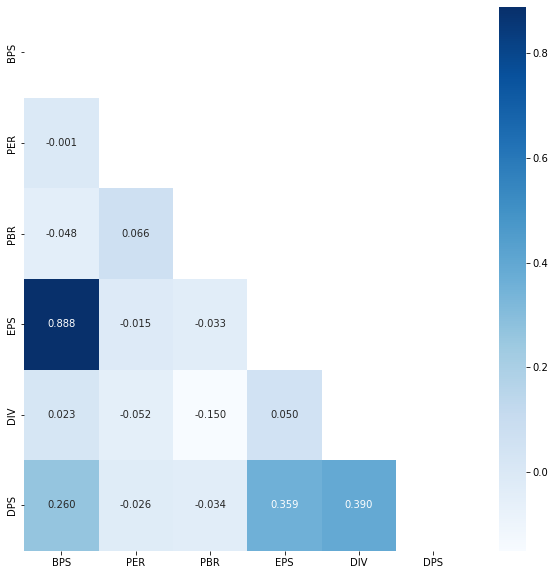

In [16]:
financial_indicator = ['BPS', 'PER', 'PBR', 'EPS', 'DIV', 'DPS']
mask = np.zeros_like(x_train[financial_indicator].corr())
mask[np.triu_indices_from(mask)] = True
plt.rcParams["figure.figsize"] = (10, 10)
sns.heatmap(data = x_train[financial_indicator].corr(), mask=mask, annot=True, fmt = '.3f', cmap='Blues')

In [18]:
import umap
#import umap.umap_ as umap
reducer = umap.UMAP()
embedding = reducer.fit_transform(x_train[financial_indicator])
embedding.shape

c:\Users\bkjeo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
c:\Users\bkjeo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_spectral_embedding.py:374: UserWarning: Exited at iteration 531 with accuracies 
[1.24100781e-15 4.02851996e-06 1.76345612e-05 8.97609144e-06]
not reaching the requested tolerance 1e-05.
  _, diffusion_map = lobpcg(


(76496, 2)

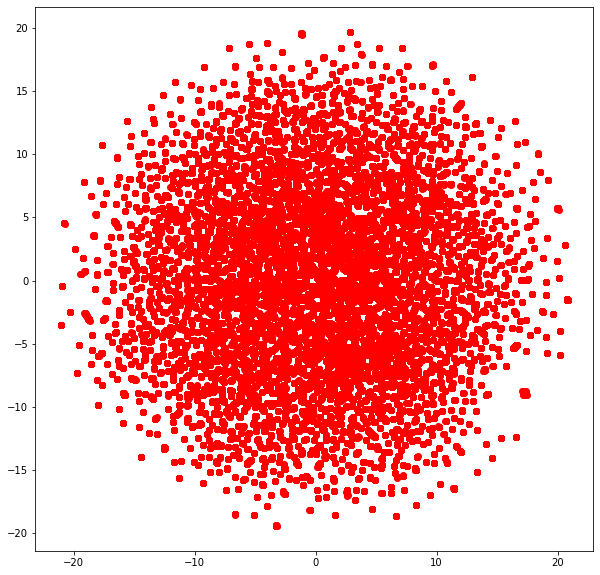

In [19]:
import matplotlib.pyplot as plt
plt.scatter(embedding[:,0], embedding[:,1], color = 'red')

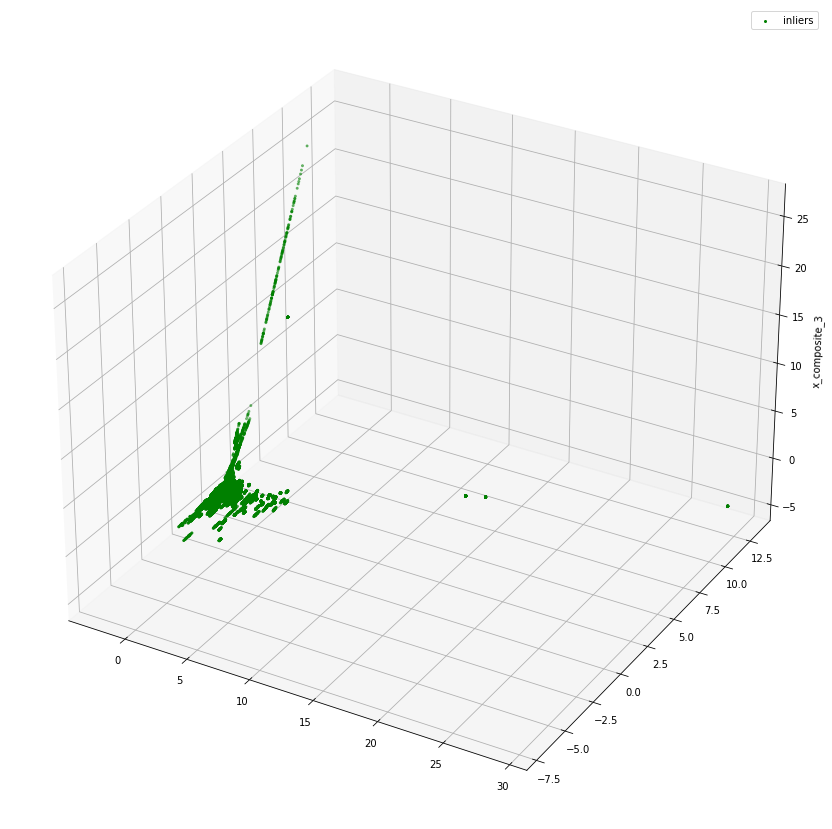

In [20]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

pca = PCA(n_components=3)
scaler = StandardScaler()

X = scaler.fit_transform(x_train[financial_indicator])
X_reduce = pca.fit_transform(X)

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
ax.set_zlabel("x_composite_3")


ax.scatter(X_reduce[:, 0], X_reduce[:, 1], zs=X_reduce[:, 2], s=4, lw=1, label="inliers",c="green")
#ax.scatter(X_reduce[outlier_index,0],X_reduce[outlier_index,1], X_reduce[outlier_index,2],
#           lw=2, s=60, marker="x", c="red", label="outliers")

ax.legend()
plt.show()

In [ ]:
from sklearn.cluster import KMeans
from collections import Counter

kmeans = KMeans(n_clusters = 16, random_state = 0).fit(X)
Counter(kmeans.labels_).values()